In [69]:
import pandas as pd
import missingno as msno
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("Data/Train.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 82 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

In [6]:
df.describe()

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
count,30557.000000,30557.000000,30557.000000,3.055700e+04,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,...,23320.000000,23320.000000,23320.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000
mean,61.148045,29.025866,117.992234,7.983756e+03,125.831135,15.302326,70.552747,0.006004,9.321342,0.416886,...,35.590916,-123.697777,46.533951,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630
std,46.861309,33.119775,100.417713,4.863090e+04,146.581856,10.688573,18.807884,0.003787,9.343226,2.707990,...,18.955228,71.916036,14.594267,929.633988,1741.299304,0.027016,55.101250,18.004375,84.702355,24.786350
min,1.000000,1.000000,1.000000,0.000000e+00,2.000000,0.420044,5.128572,0.000139,-34.647879,-15.559646,...,0.000000,-179.880630,0.000000,0.000000,0.000000,0.000000,-105.367363,0.000000,-179.947422,0.000000
25%,25.000000,5.000000,60.000000,1.064920e+03,44.000000,7.666667,58.600002,0.003403,3.123071,-1.097864,...,19.451524,-165.882624,36.693094,0.000000,0.000000,0.000000,0.000000,0.000000,-161.726937,0.000000
50%,50.000000,15.000000,91.000000,2.395350e+03,72.000000,12.200000,74.099998,0.004912,8.478424,0.222092,...,37.918838,-156.637162,47.445010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,44.000000,155.000000,5.882550e+03,150.000000,19.900000,85.450001,0.007562,16.201563,1.772925,...,52.270055,-118.453598,57.438181,1861.674119,3393.541633,0.023829,62.245728,27.412303,0.000000,47.090635
max,815.000000,438.000000,999.000000,1.841490e+06,1552.000000,72.599998,100.000000,0.021615,37.437921,17.955124,...,66.111289,179.776125,79.631711,2112.522949,6478.550544,0.210483,77.355232,59.972710,179.813344,69.992363


weather data. Humidity, temperature and wind speed, which can be used as inputs for your model.

For each pollutant, we queried the offline Level 3 (L3) datasets available in Google Earth Engine 



In [18]:
df.isnull().sum()>0

Place_ID X Date                 False
Date                            False
Place_ID                        False
target                          False
target_min                      False
                                ...  
L3_CH4_aerosol_optical_depth     True
L3_CH4_sensor_azimuth_angle      True
L3_CH4_sensor_zenith_angle       True
L3_CH4_solar_azimuth_angle       True
L3_CH4_solar_zenith_angle        True
Length: 82, dtype: bool

In [29]:
df.loc[:,(df.isnull().sum()>0) & (df.dtypes!="object")].columns

Index(['L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
       'L3_O3_sensor_zenith_angle', 'L3_O3_solar_azimuth_angle',
       'L3_O3_solar_zenith_angle', 'L3_CO_CO_column_number_density',
       'L3_CO_H2O_column_number_density', 'L3_CO_cloud_height',
       'L3_CO_sensor_altitude', 'L3_CO_sensor_azimuth_angle',
       'L3_CO_sensor_zenith_angle', 'L3_CO_solar_azimuth_angle',
       'L3_CO_solar_zenith_angle', 'L3_HCHO_HCHO_slant_column_nu

In [51]:
df.loc[:,(df.isnull().sum()==0) & (df.dtypes!="object")].shape

(30557, 11)

In [52]:
df.loc[:,df.columns.str.contains("cloud_fraction")]

,L3_NO2_cloud_fraction,L3_O3_cloud_fraction,L3_HCHO_cloud_fraction,L3_CLOUD_cloud_fraction,L3_SO2_cloud_fraction
0,0.006507,0.000000,0.000000,0.000000,0.000000
1,0.018360,0.059433,0.059433,0.059358,0.059433
2,0.015904,0.082063,0.082063,0.082247,0.082063
3,0.055765,0.121261,0.121261,0.121555,0.121261
4,0.028530,0.037919,0.037919,0.037008,0.037919
...,...,...,...,...,...
30552,0.001107,0.001310,0.001310,0.001238,0.001310
30553,0.004726,0.007644,0.007644,0.007750,0.007644
30554,0.026249,0.025447,0.025447,0.026480,0.025447
30555,0.144318,0.173391,0.103292,0.175418,0.153445


<Axes: >

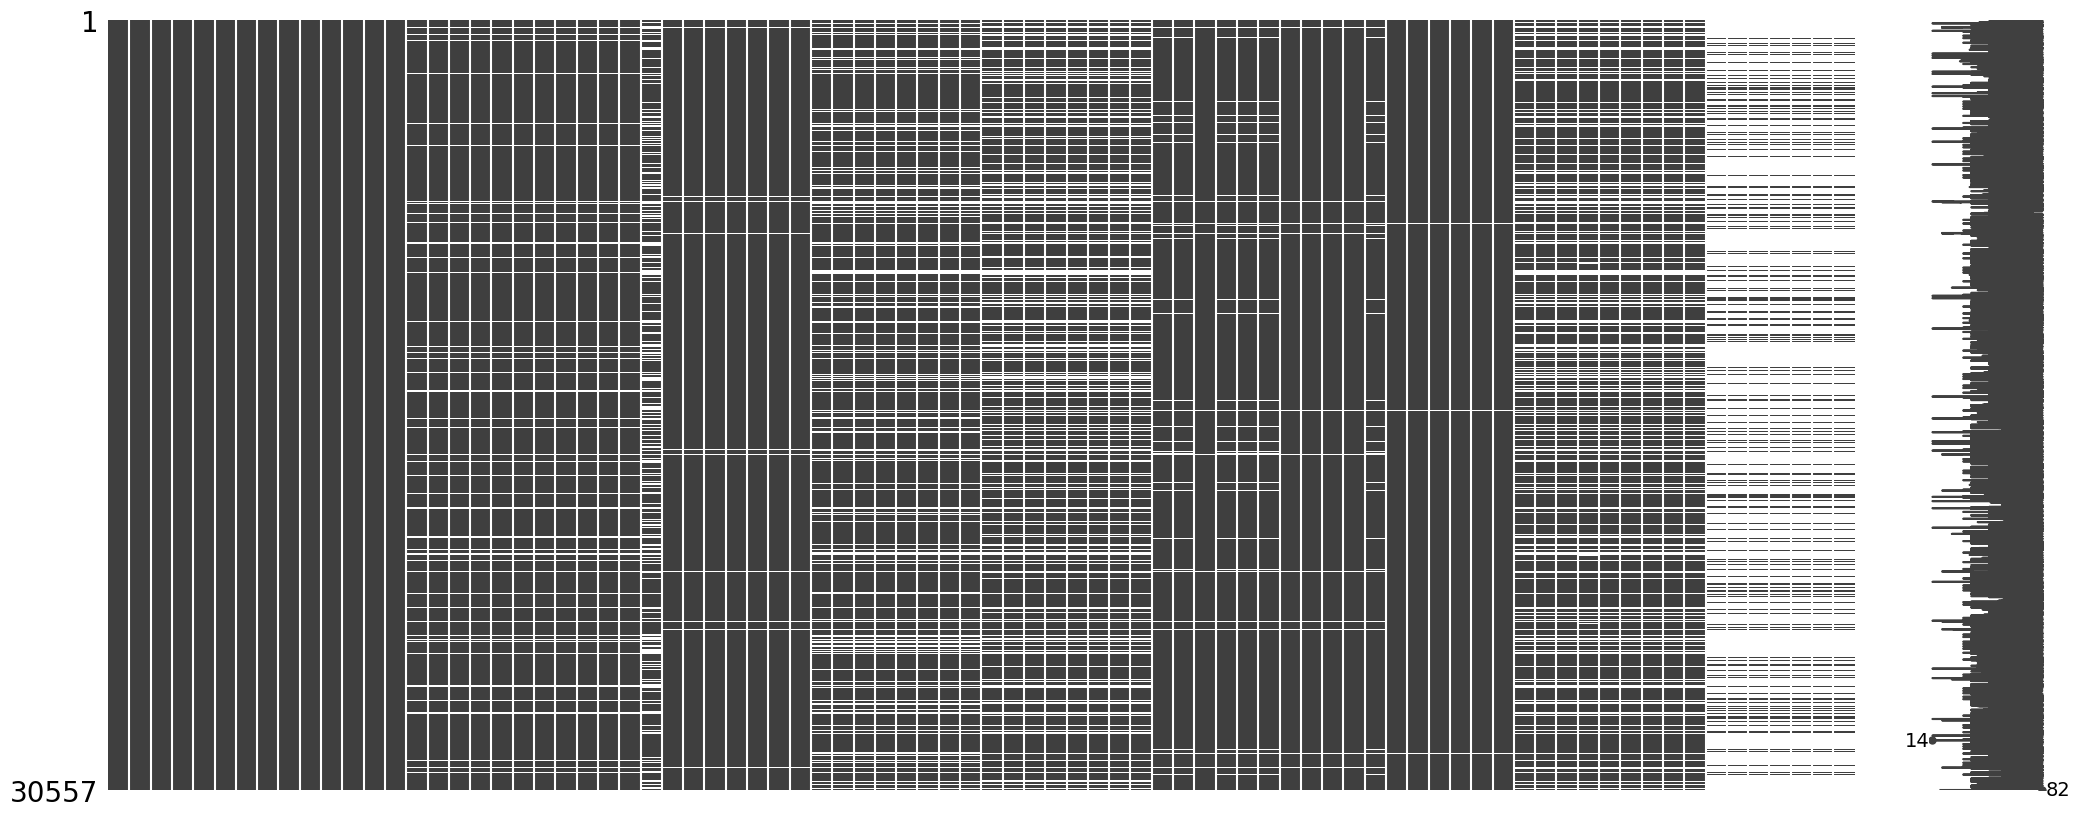

In [34]:
msno.matrix(df)

In [48]:
df.shape

(30557, 82)

<Axes: >

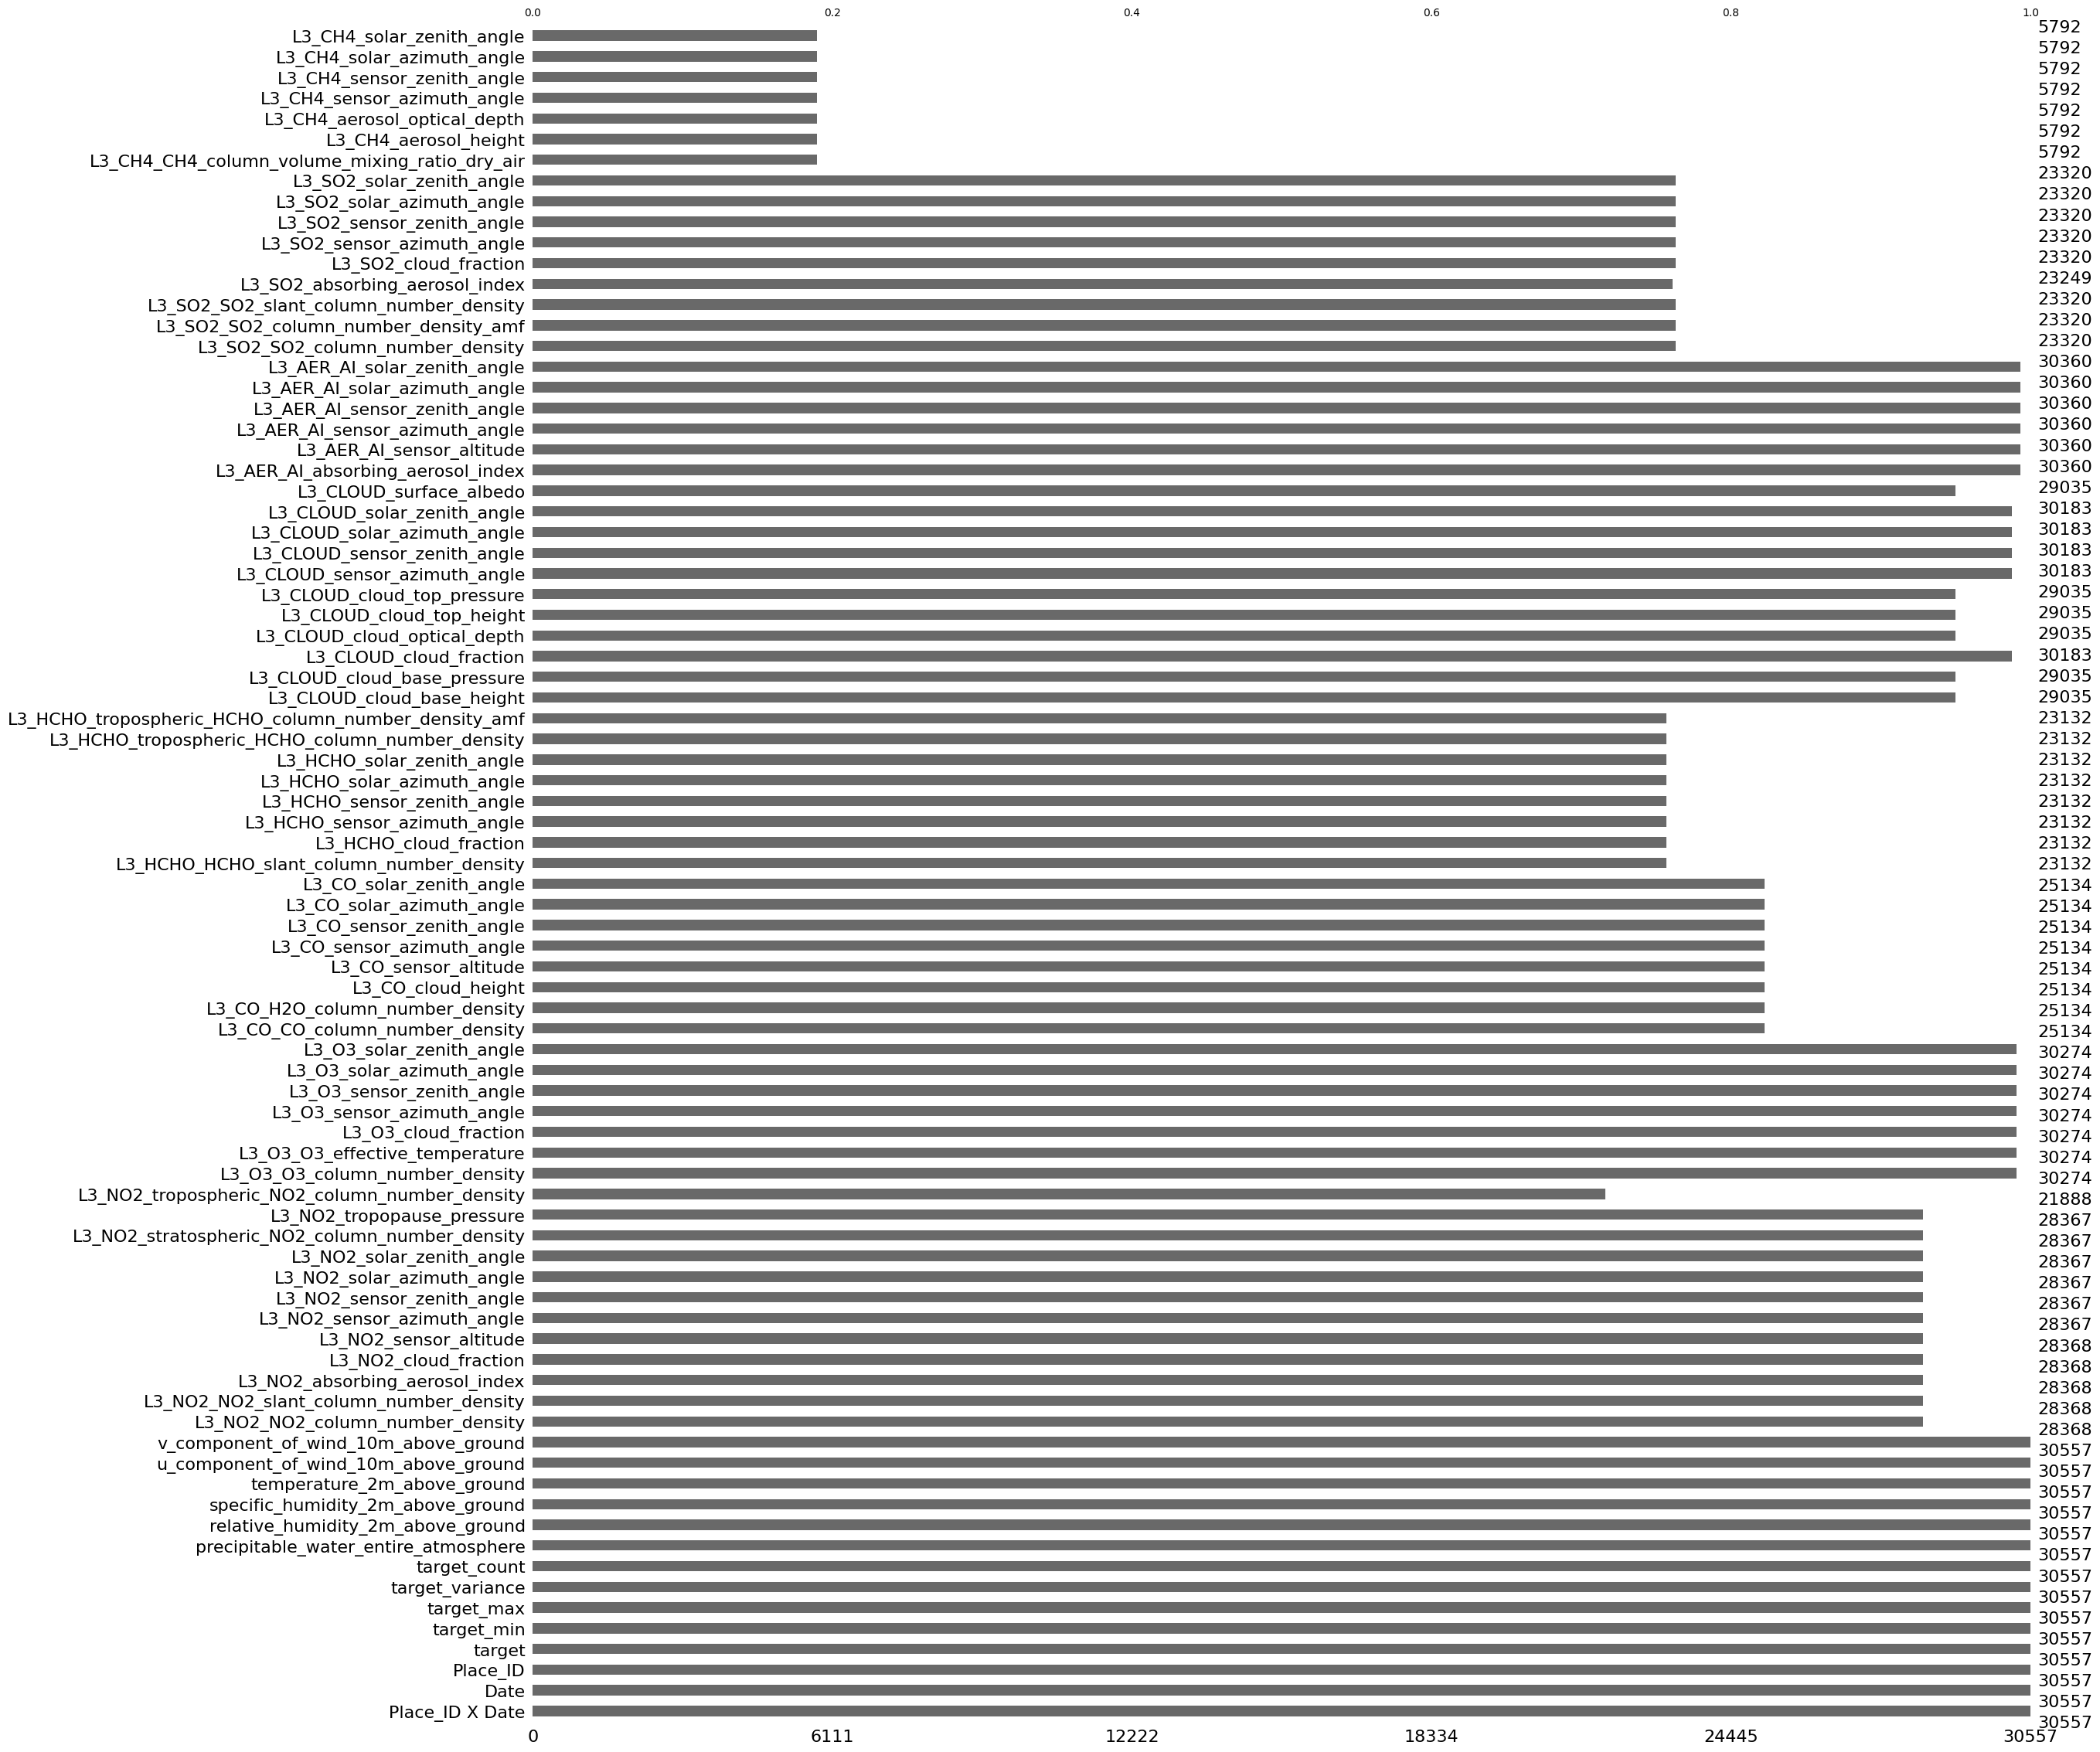

In [36]:
msno.bar(df)

<Axes: >

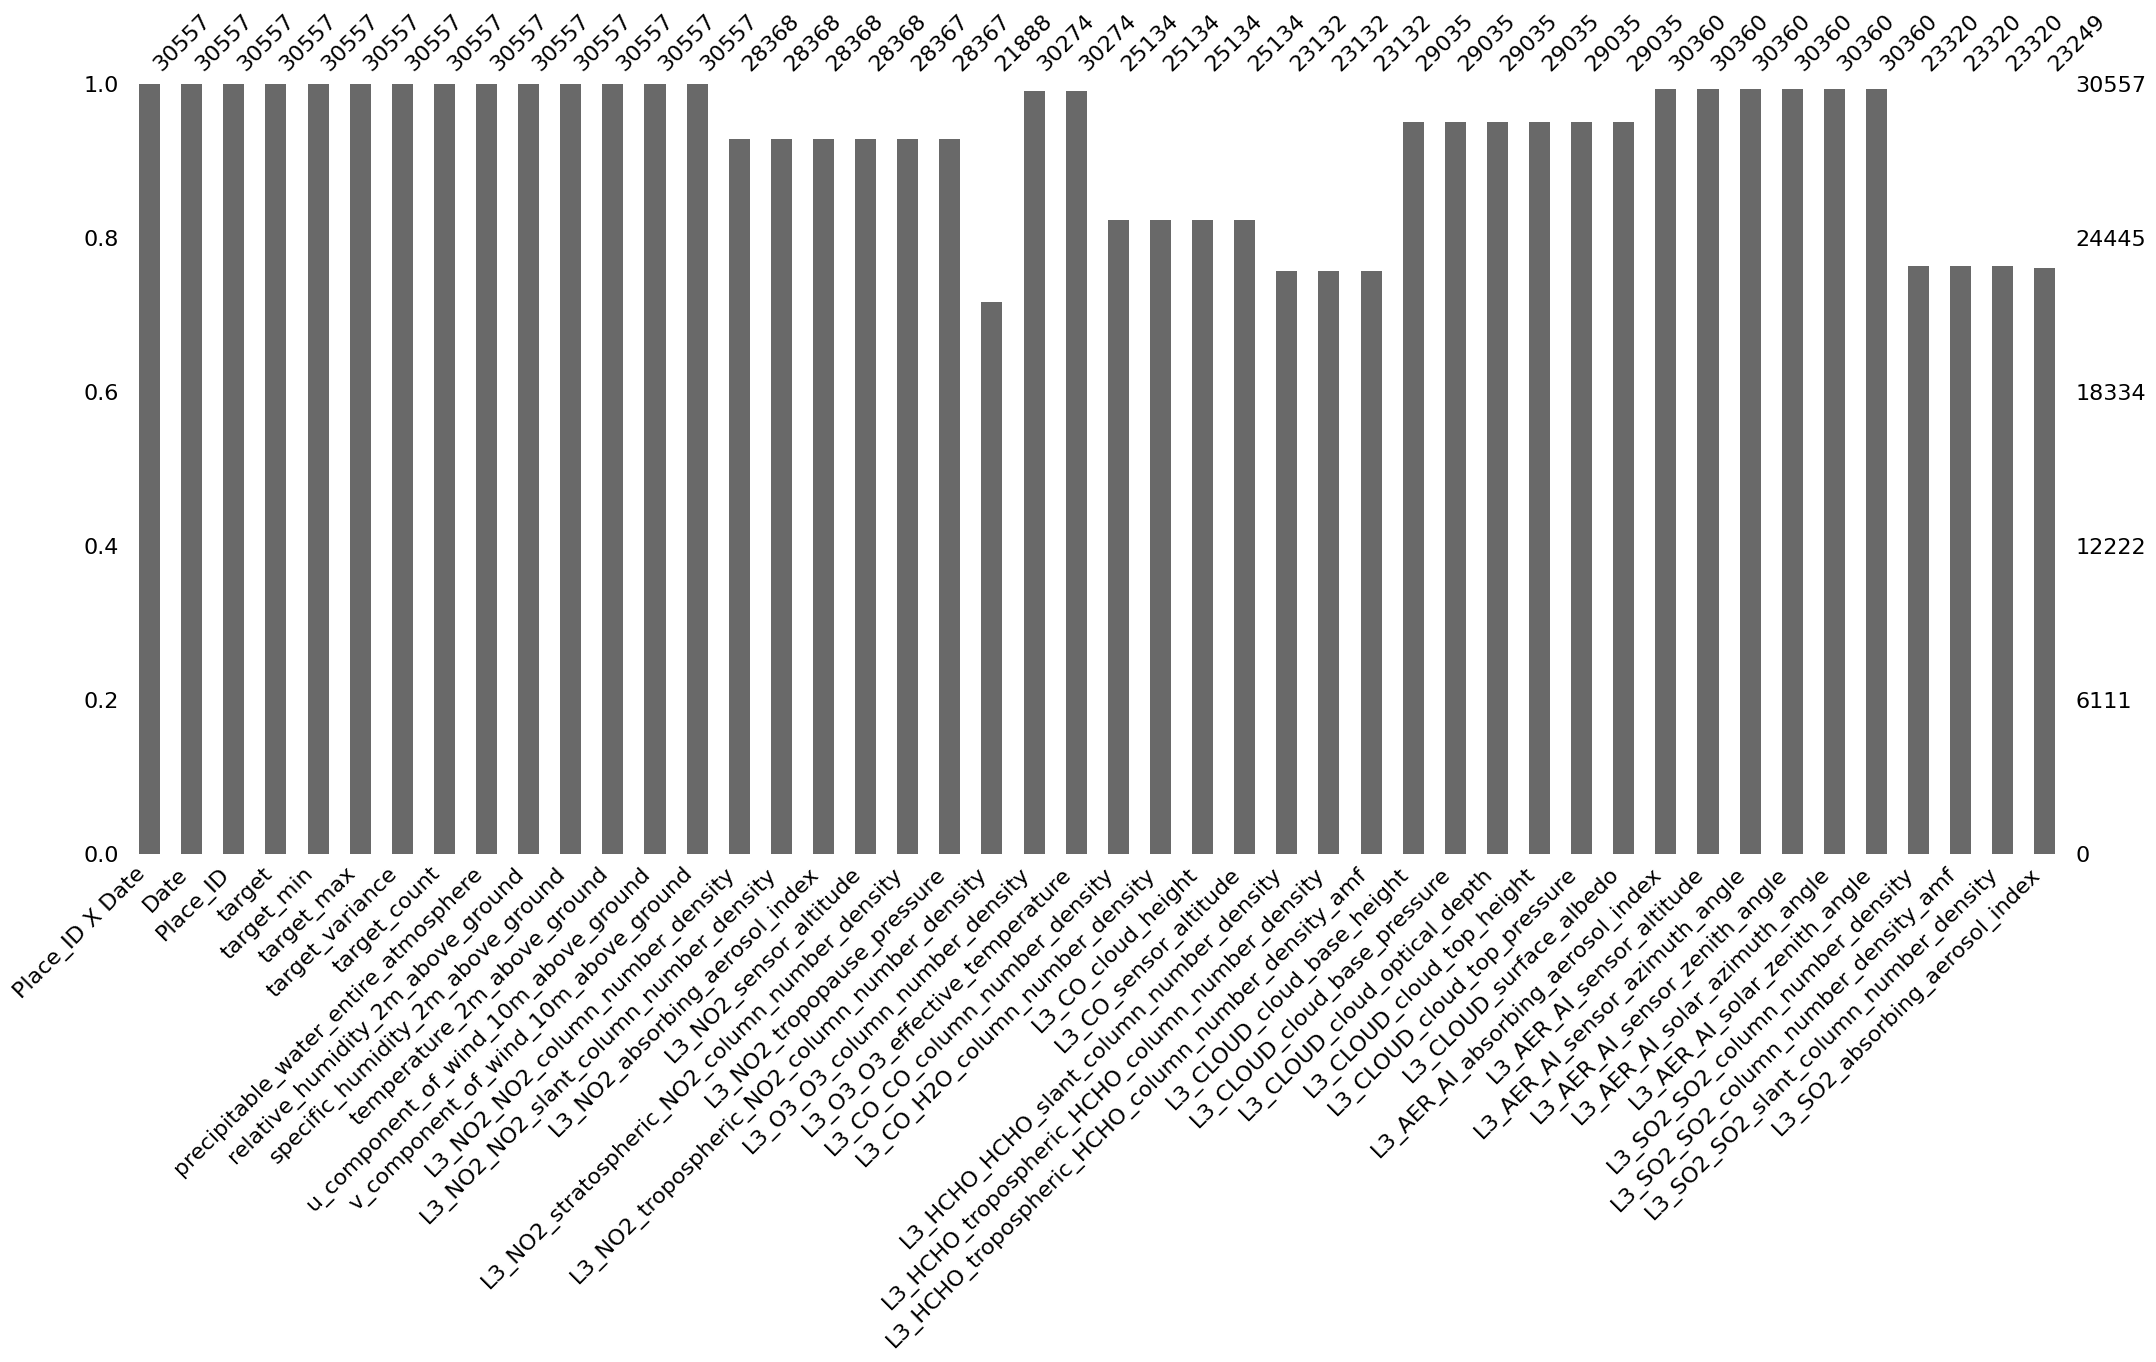

In [111]:
msno.bar(df_drop_angles)

In [37]:
df.loc[:,df.dtypes=="object"].columns

Index(['Place_ID X Date', 'Date', 'Place_ID'], dtype='object')

In [41]:
df["Place_ID X Date"]

0        010Q650 X 2020-01-02
1        010Q650 X 2020-01-03
2        010Q650 X 2020-01-04
3        010Q650 X 2020-01-05
4        010Q650 X 2020-01-06
                 ...         
30552    YWSFY6Q X 2020-03-15
30553    YWSFY6Q X 2020-03-16
30554    YWSFY6Q X 2020-03-17
30555    YWSFY6Q X 2020-03-18
30556    YWSFY6Q X 2020-03-19
Name: Place_ID X Date, Length: 30557, dtype: object

In [42]:
df["Date"]

0        2020-01-02
1        2020-01-03
2        2020-01-04
3        2020-01-05
4        2020-01-06
            ...    
30552    2020-03-15
30553    2020-03-16
30554    2020-03-17
30555    2020-03-18
30556    2020-03-19
Name: Date, Length: 30557, dtype: object

In [44]:
df["Place_ID"]

0        010Q650
1        010Q650
2        010Q650
3        010Q650
4        010Q650
          ...   
30552    YWSFY6Q
30553    YWSFY6Q
30554    YWSFY6Q
30555    YWSFY6Q
30556    YWSFY6Q
Name: Place_ID, Length: 30557, dtype: object

In [45]:
df.isna().sum()

Place_ID X Date                     0
Date                                0
Place_ID                            0
target                              0
target_min                          0
                                ...  
L3_CH4_aerosol_optical_depth    24765
L3_CH4_sensor_azimuth_angle     24765
L3_CH4_sensor_zenith_angle      24765
L3_CH4_solar_azimuth_angle      24765
L3_CH4_solar_zenith_angle       24765
Length: 82, dtype: int64

<Axes: >

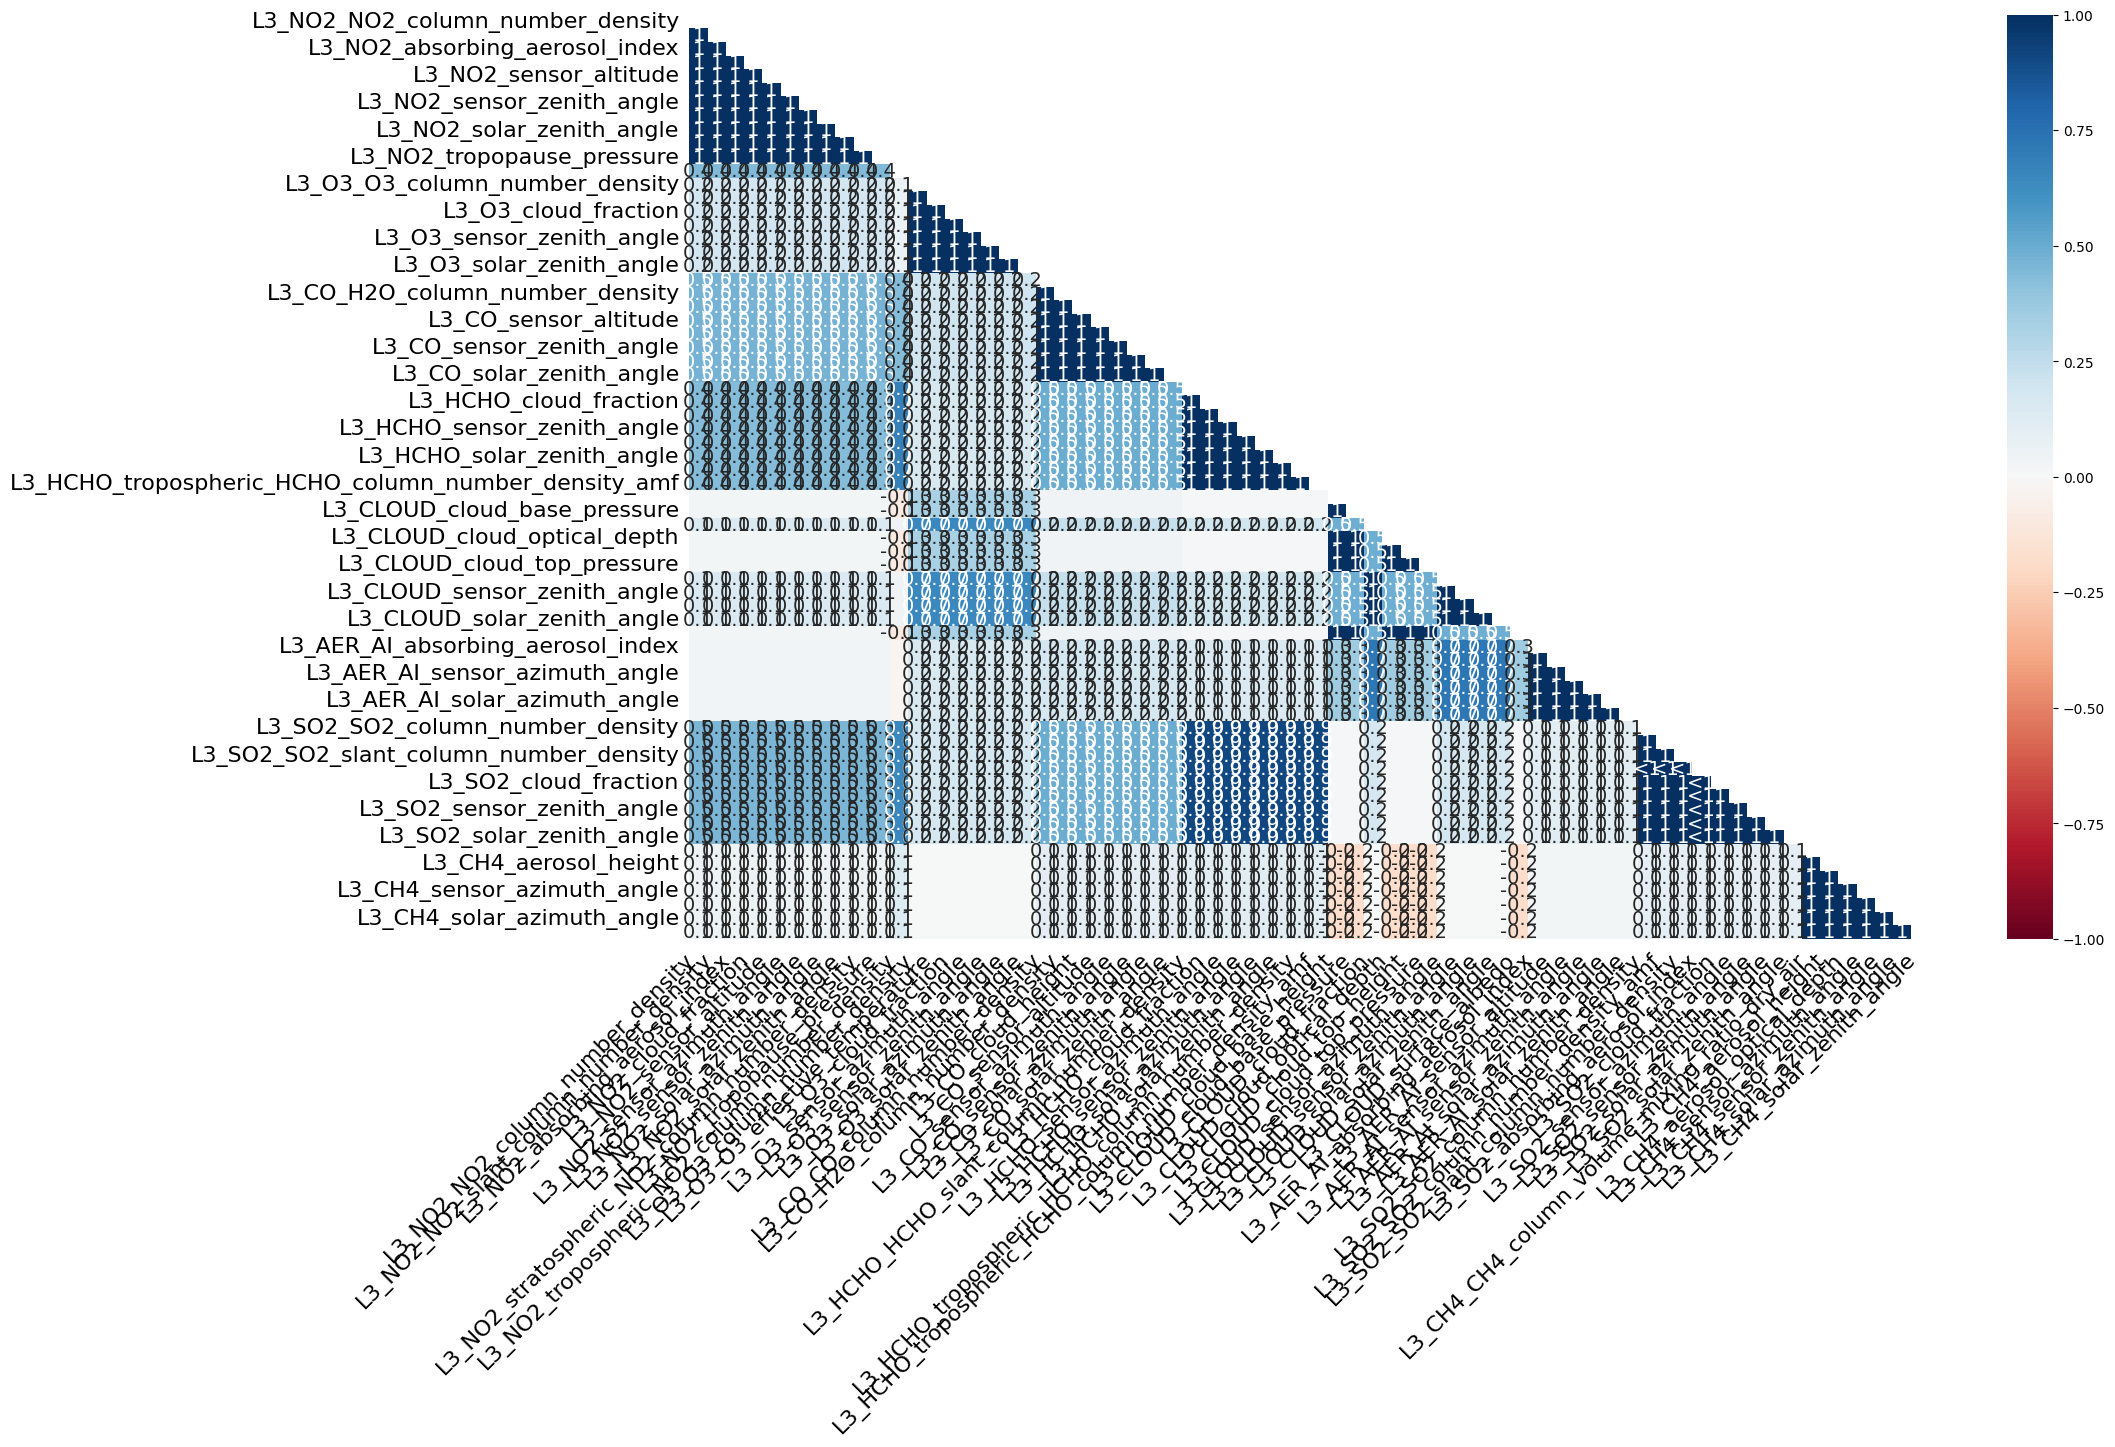

In [46]:
msno.heatmap(df)

In [86]:
df.columns

Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
   

In [ ]:
corr_cloud_fraction=df.loc[:,df.columns.str.contains("cloud_fraction")].corr()
corr_solar_azimuth=df.loc[:,(df.columns.str.contains("solar_azimuth"))&(~df.columns.str.contains("CH4")) ].corr()
corr_solar_zenith=df.loc[:,(df.columns.str.contains("solar_zenith"))&(~df.columns.str.contains("CH4")) ].corr()
corr_sensor_azimuth=df.loc[:,(df.columns.str.contains("sensor_azimuth"))&(~df.columns.str.contains("CH4")) ].corr()
corr_sensor_zenith=df.loc[:,(df.columns.str.contains("sensor_zenith"))&(~df.columns.str.contains("CH4")) ].corr()
corr_sensor_altitude=df.loc[:,(df.columns.str.contains("sensor_altitude"))&(~df.columns.str.contains("CH4")) ].corr()
corr_absorbing_aerosol_index= df.loc[:,(df.columns.str.contains("absorbing_aerosol_index"))&(~df.columns.str.contains("CH4")) ].corr()

In [112]:

df_drop_angles=df.drop(df.loc[:,(df.columns.str.contains("solar_zenith_angle"))&(~df.columns.str.contains("AER_AI_solar_zenith_angle"))],axis=1)
df_drop_angles=df_drop_angles.drop(df.loc[:,(df.columns.str.contains("solar_azimuth_angle"))&(~df.columns.str.contains("AER_AI_solar_azimuth_angle"))],axis=1)
df_drop_angles=df_drop_angles.drop(df.loc[:,(df.columns.str.contains("sensor_azimuth_angle"))&(~df.columns.str.contains("AER_AI_sensor_azimuth_angle"))],axis=1)
df_drop_angles=df_drop_angles.drop(df.loc[:,(df.columns.str.contains("sensor_zenith_angle"))&(~df.columns.str.contains("AER_AI_sensor_zenith_angle"))],axis=1)
df_drop_angles=df_drop_angles.drop(df_drop_angles.loc[:,(df_drop_angles.columns.str.contains("CH4"))],axis=1)
df_drop_angles=df_drop_angles.drop(df_drop_angles.loc[:,(df_drop_angles.columns.str.contains("cloud_fraction"))&(~df_drop_angles.columns.str.contains("Cloud_cloud_fraction"))],axis=1)
df_drop_angles=df_drop_angles.drop(df_drop_angles.loc[:,(df_drop_angles.columns.str.contains("stratospheric"))],axis=1)
df_drop_angles.shape

(30557, 45)

In [117]:
df_drop=df_drop_angles
df_drop=df_drop_angles.drop(df_drop_angles.loc[:,(df_drop_angles.columns.str.contains("target"))],axis=1)
df_drop.drop("Place_ID X Date",axis=1,inplace=True)
df_drop.shape

(30557, 39)

In [116]:
df_drop.columns

Index(['Place_ID X Date', 'Date', 'Place_ID',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_sensor_altitude',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_CO_CO_column_number_density', 'L3_CO_H2O_column_number_density',
       'L3_CO_cloud_height', 'L3_CO_sensor_altitude',
       'L3_HCHO_HCHO_slant_column_number_density',
       'L3_HCHO_tropospheric_HCHO_column_number_density',
       'L3_HCHO_tropospheric_HCHO_column_number_density_amf',
       'L3_CLOUD_cloud_base_height', 'L3_CLOUD_cloud_base_pressure

<Axes: >

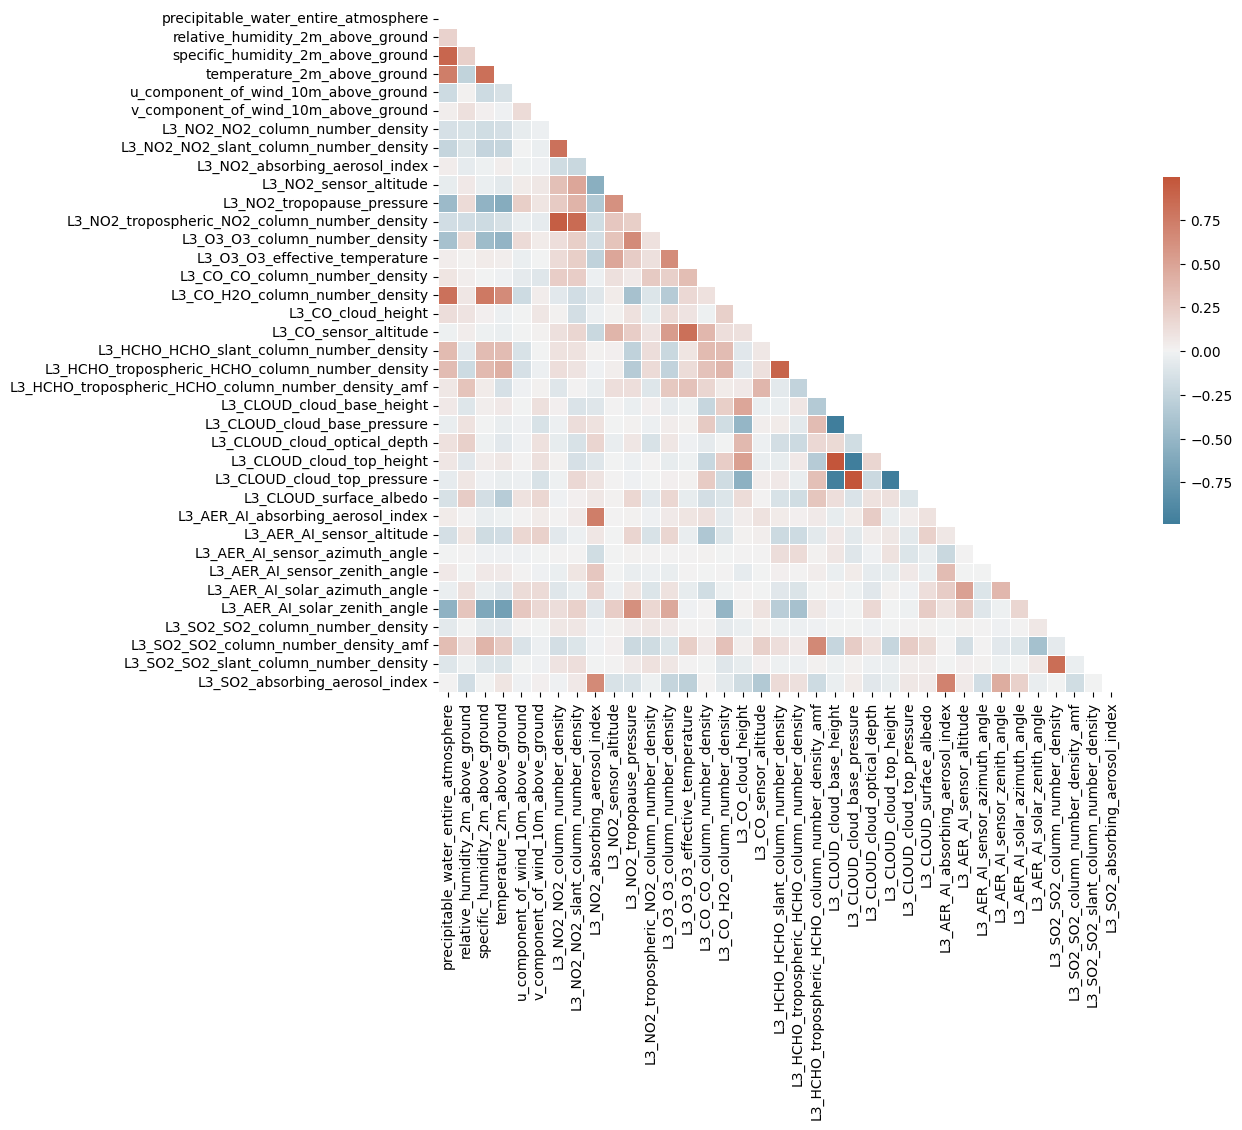

In [120]:
corr_drop=df_drop.drop(["Date","Place_ID"],axis=1).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_drop, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_drop, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: >

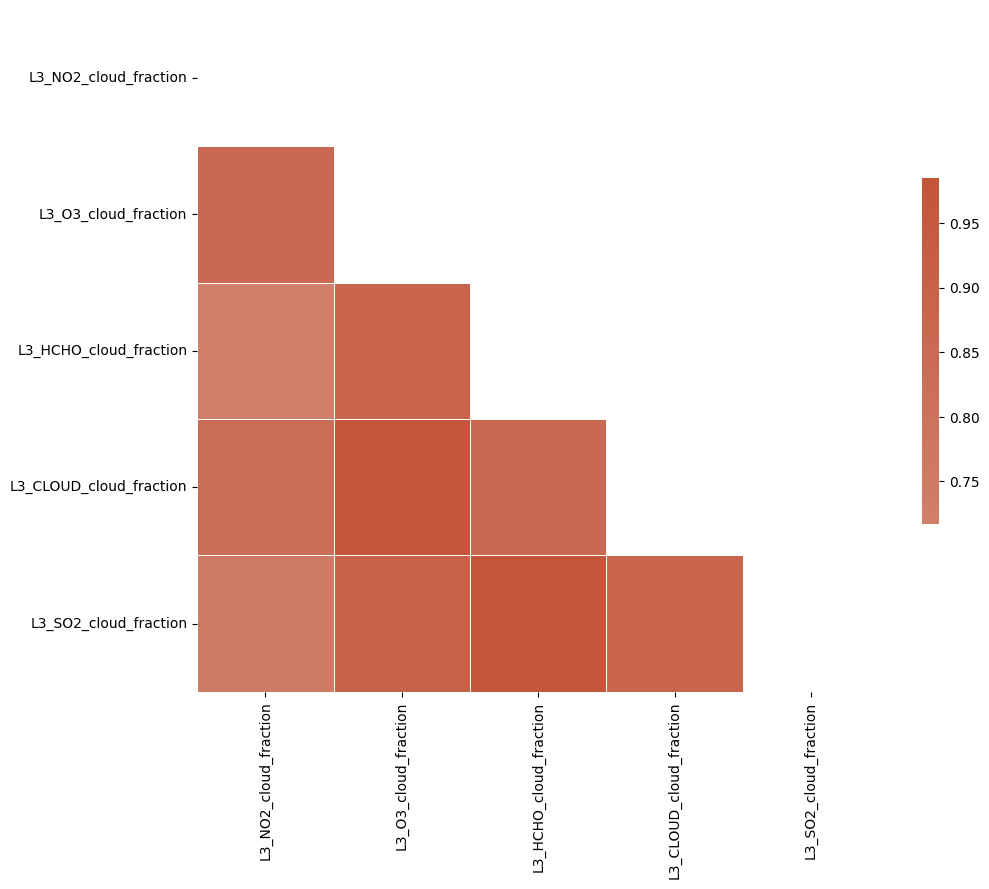

In [72]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_cloud_fraction, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_cloud_fraction, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: >

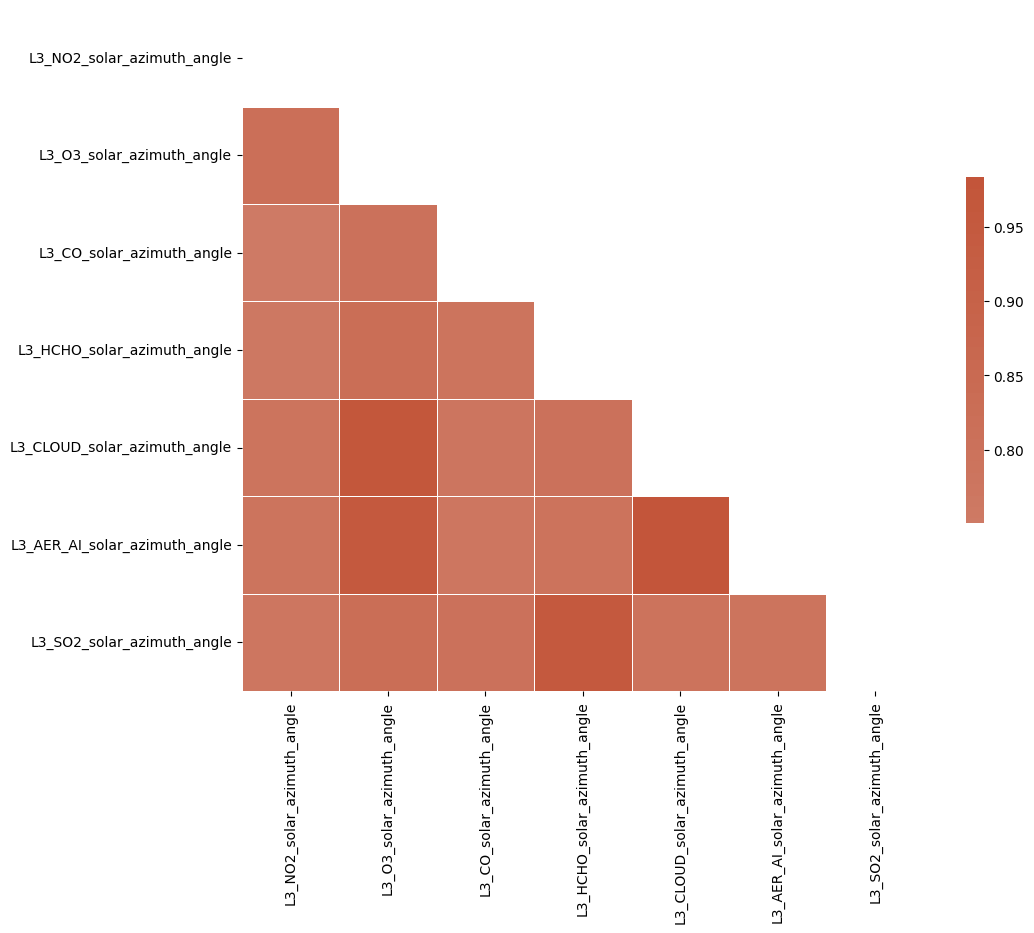

In [ ]:


"))&(~df.columns.str.contains("CH4")) ].corr()


<Axes: >

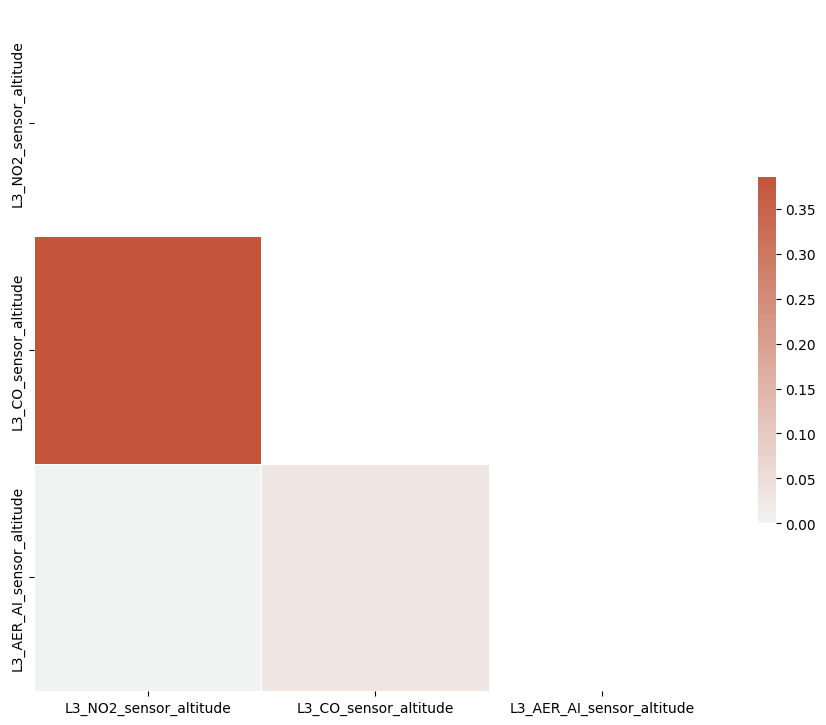

In [83]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_sensor_altitude, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_sensor_altitude, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: >

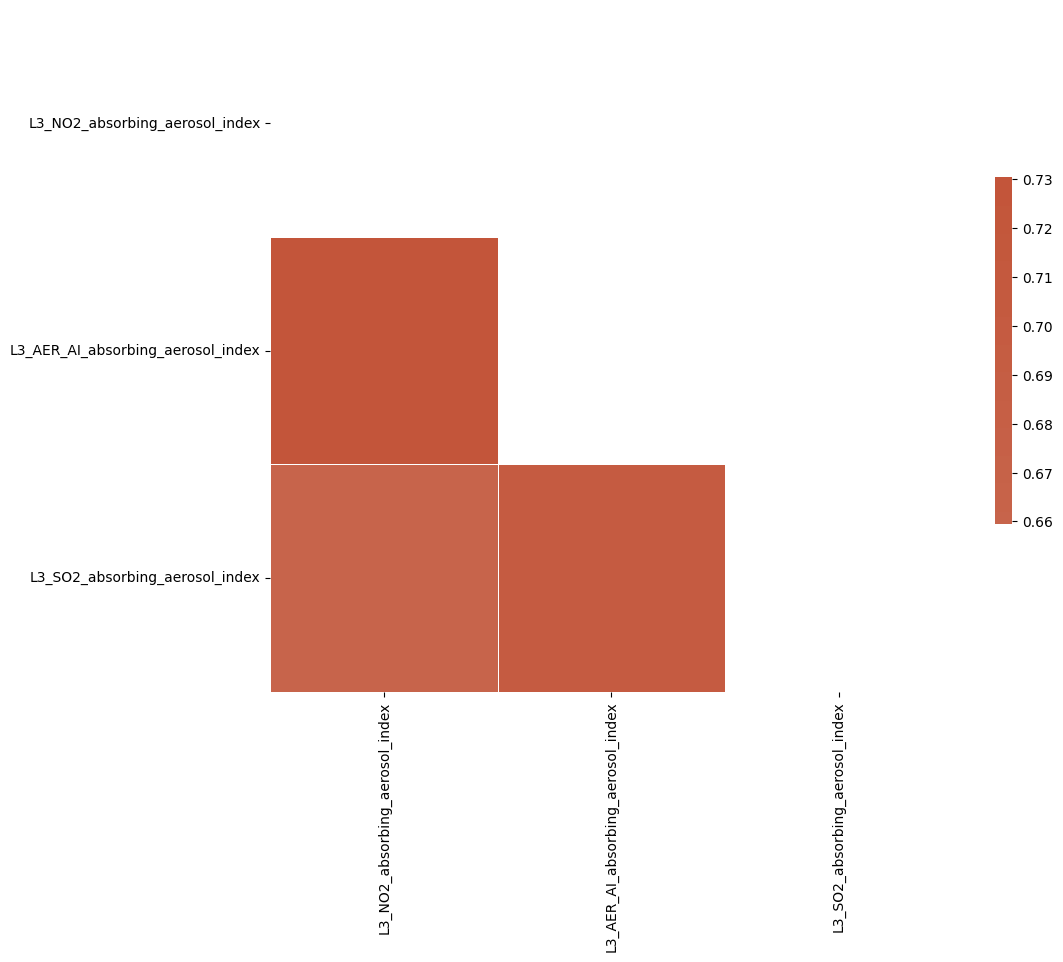

In [88]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_absorbing_aerosol_index, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_absorbing_aerosol_index, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})